# Import libreries

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import fuzzywuzzy
from fuzzywuzzy import process

from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,accuracy_score,mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Import dataset

In [3]:
data=pd.read_csv(r"C:\Users\Dell\Downloads\9961_14084_bundle_archive\Train.csv")
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
data.shape

(8523, 12)

In [6]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
data.describe(include="object")

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


# Handling null values

In [8]:
data["Item_Weight"]=data["Item_Weight"].fillna(data["Item_Weight"].mean())
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
data["Outlet_Size"].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [10]:
data["Outlet_Size"]=data["Outlet_Size"].fillna(data["Outlet_Size"].mode()[0])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# EXPLORATORY DATA ANALYSIS

In [11]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [12]:
data.set_index("Item_Identifier",inplace=True)

In [13]:
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,,,,,,,,,,,
FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


(array([ 483.,  870.,  865.,  664., 2242.,  629.,  755.,  735.,  677.,
         603.]),
 array([ 4.555 ,  6.2345,  7.914 ,  9.5935, 11.273 , 12.9525, 14.632 ,
        16.3115, 17.991 , 19.6705, 21.35  ]),
 <BarContainer object of 10 artists>)

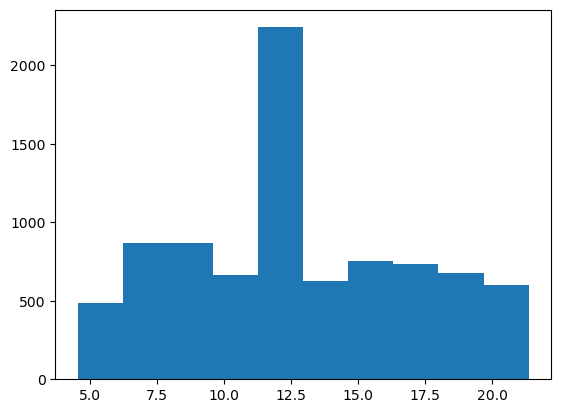

In [14]:
plt.hist(data["Item_Weight"])

In [15]:
fats=data.Item_Fat_Content.unique()

In [16]:
def replace_matches_in_column(df, column, string_to_match, min_ratio):
    # get a list of unique strings
    strings = df[column].unique()
    
    # get the top 10 closest matches to our input string
    matches = fuzzywuzzy.process.extract(string_to_match, strings, 
                                         limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

    # only get matches with a ratio > 90
    close_matches = [matches[0] for matches in matches if matches[1] >= min_ratio]

    # get the rows of all the close matches in our dataframe
    rows_with_matches = df[column].isin(close_matches)

    # replace all rows with close matches with the input matches 
    df.loc[rows_with_matches, column] = string_to_match
    
    # let us know the function's done
    print("All done!")

In [17]:
matches = fuzzywuzzy.process.extract("low fat", fats, limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
matches

[('Low Fat', 100), ('low fat', 100), ('LF', 22), ('Regular', 14), ('reg', 0)]

In [18]:
replace_matches_in_column(data,"Item_Fat_Content", "low fat", 20)
replace_matches_in_column(data,"Item_Fat_Content", "Regular", 20)

All done!
All done!


In [19]:
data["Item_Fat_Content"].unique()

array(['low fat', 'Regular'], dtype=object)

In [20]:
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,,,,,,,,,,,
FDA15,9.30,low fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
FDN15,17.50,low fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
NCD19,8.93,low fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [21]:
data["Item_Type"].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

We can see from the above plot that house hold foods are always of low fat content. So, prefer them to stay healthy...

In [24]:
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,,,,,,,,,,,
FDA15,9.30,low fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
FDN15,17.50,low fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
NCD19,8.93,low fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


<AxesSubplot:>

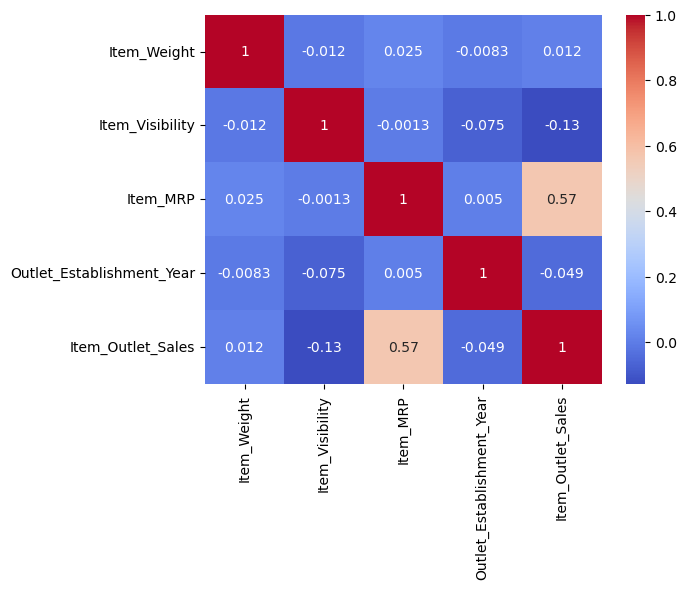

In [25]:
corr=data.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)

# Normalizing numerical columns

In [26]:
numerical_df=data.select_dtypes(include="number")
numerical_df.drop("Outlet_Establishment_Year",axis=1,inplace=True)
numerical_df.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
Item_Identifier,,,,
FDA15,9.30,0.016047,249.8092,3735.1380
DRC01,5.92,0.019278,48.2692,443.4228
FDN15,17.50,0.016760,141.6180,2097.2700
FDX07,19.20,0.000000,182.0950,732.3800
NCD19,8.93,0.000000,53.8614,994.7052


In [27]:
grid = plt.GridSpec(2,2, hspace=0.5,  wspace=0.2)

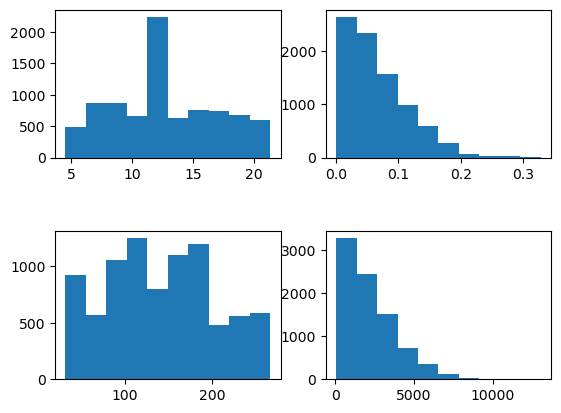

In [28]:
k=0
for i in range(2):
    for j in range(2):    
        plt.subplot(grid[i,j])
        plt.hist(numerical_df.iloc[:,k])
        k+=1
            

All these columns are not normal..

In [29]:
(numerical_df <= 0).any()

Item_Weight          False
Item_Visibility       True
Item_MRP             False
Item_Outlet_Sales    False
dtype: bool

In [30]:
transformed_df = numerical_df[["Item_Weight","Item_MRP","Item_Outlet_Sales"]].apply(lambda x: stats.boxcox(x)[0])
transformed_df.head()

,Item_Weight,Item_MRP,Item_Outlet_Sales
Item_Identifier,,,
FDA15,5.530263,65.652445,47.007885
DRC01,3.609073,19.920687,20.958294
FDN15,9.519719,43.751419,37.964893
FDX07,10.272881,52.395806,25.485930
NCD19,5.330905,21.614642,28.660858


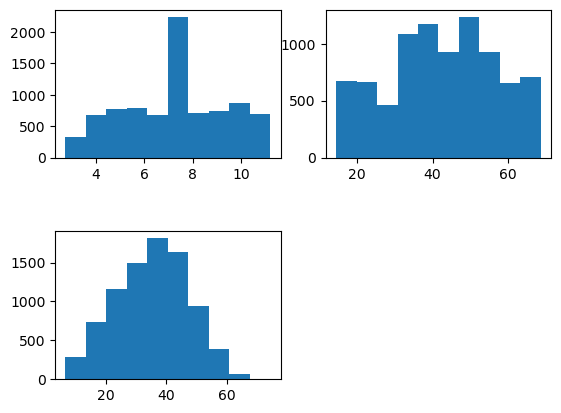

In [31]:
k=0
for i in range(2):
    for j in range(2): 
        if(k<=2):
            plt.subplot(grid[i,j])
            plt.hist(transformed_df.iloc[:,k])
            k+=1

In [32]:
data[["Item_Weight","Item_MRP","Item_Outlet_Sales"]]=transformed_df

In [33]:
scaler = StandardScaler()
normalized_data = scaler.fit_transform(numerical_df[["Item_Visibility"]])
data["Item_Visibility"]=normalized_data

In [34]:
numerical_df=data.select_dtypes(include="number")
numerical_df.drop("Outlet_Establishment_Year",axis=1,inplace=True)

In [35]:
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,,,,,,,,,,,
FDA15,5.530263,low fat,-0.970732,Dairy,65.652445,OUT049,1999,Medium,Tier 1,Supermarket Type1,47.007885
DRC01,3.609073,Regular,-0.908111,Soft Drinks,19.920687,OUT018,2009,Medium,Tier 3,Supermarket Type2,20.958294
FDN15,9.519719,low fat,-0.956917,Meat,43.751419,OUT049,1999,Medium,Tier 1,Supermarket Type1,37.964893
FDX07,10.272881,Regular,-1.281758,Fruits and Vegetables,52.395806,OUT010,1998,Medium,Tier 3,Grocery Store,25.485930
NCD19,5.330905,low fat,-1.281758,Household,21.614642,OUT013,1987,High,Tier 3,Supermarket Type1,28.660858


<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

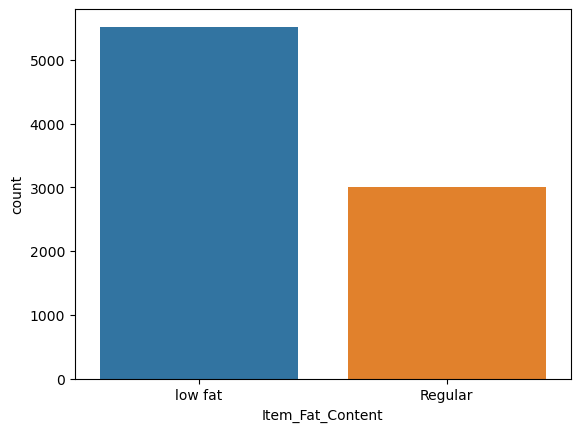

In [36]:
sns.countplot(data=data,x="Item_Fat_Content")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Soft Drinks'),
  Text(2, 0, 'Meat'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Household'),
  Text(5, 0, 'Baking Goods'),
  Text(6, 0, 'Snack Foods'),
  Text(7, 0, 'Frozen Foods'),
  Text(8, 0, 'Breakfast'),
  Text(9, 0, 'Health and Hygiene'),
  Text(10, 0, 'Hard Drinks'),
  Text(11, 0, 'Canned'),
  Text(12, 0, 'Breads'),
  Text(13, 0, 'Starchy Foods'),
  Text(14, 0, 'Others'),
  Text(15, 0, 'Seafood')])

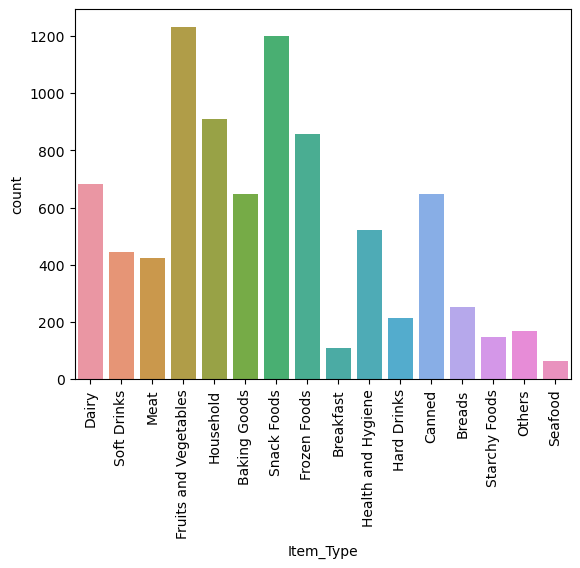

In [37]:
sns.countplot(data=data,x="Item_Type")
plt.xticks(rotation=90)

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

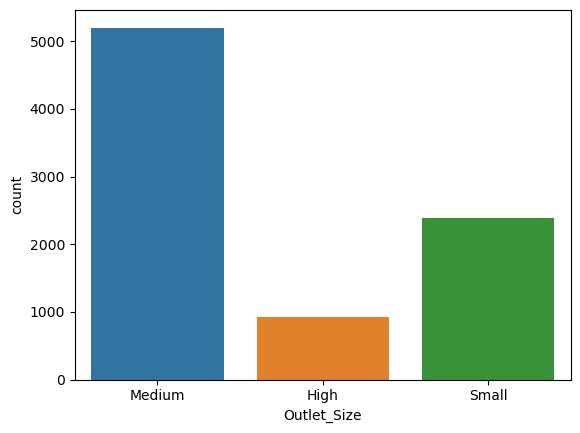

In [38]:
sns.countplot(data=data,x='Outlet_Size')

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

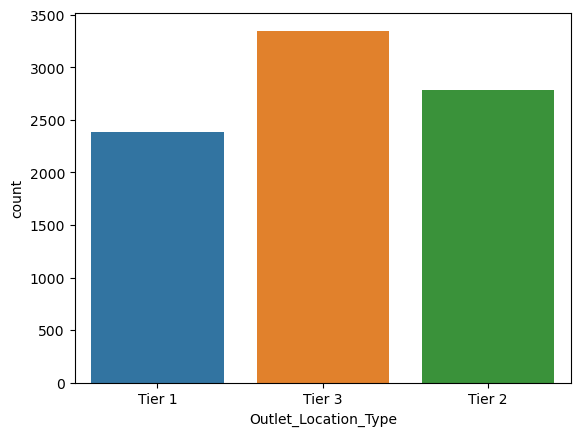

In [39]:
sns.countplot(data=data,x='Outlet_Location_Type')

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Supermarket Type1'),
  Text(1, 0, 'Supermarket Type2'),
  Text(2, 0, 'Grocery Store'),
  Text(3, 0, 'Supermarket Type3')])

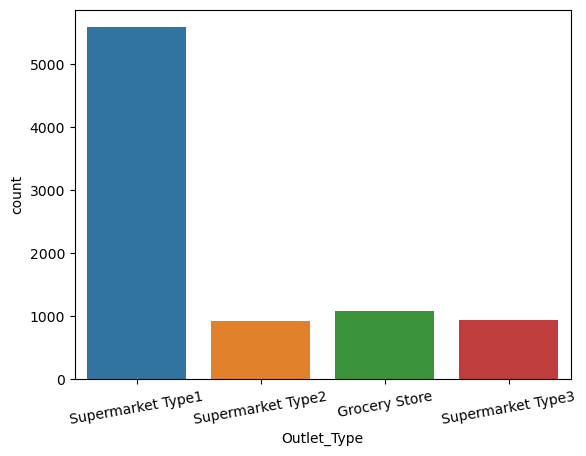

In [40]:
sns.countplot(data=data,x="Outlet_Type")
plt.xticks(rotation=10)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'OUT049'),
  Text(1, 0, 'OUT018'),
  Text(2, 0, 'OUT010'),
  Text(3, 0, 'OUT013'),
  Text(4, 0, 'OUT027'),
  Text(5, 0, 'OUT045'),
  Text(6, 0, 'OUT017'),
  Text(7, 0, 'OUT046'),
  Text(8, 0, 'OUT035'),
  Text(9, 0, 'OUT019')])

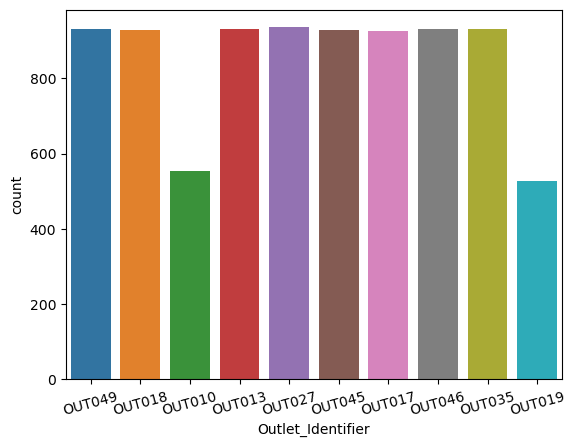

In [41]:
sns.countplot(data=data,x="Outlet_Identifier")
plt.xticks(rotation=15)

In [42]:
numerical_df.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
Item_Identifier,,,,
FDA15,5.530263,-0.970732,65.652445,47.007885
DRC01,3.609073,-0.908111,19.920687,20.958294
FDN15,9.519719,-0.956917,43.751419,37.964893
FDX07,10.272881,-1.281758,52.395806,25.485930
NCD19,5.330905,-1.281758,21.614642,28.660858


In [43]:
grid = plt.GridSpec(2,2, hspace=0.5,  wspace=0.2)

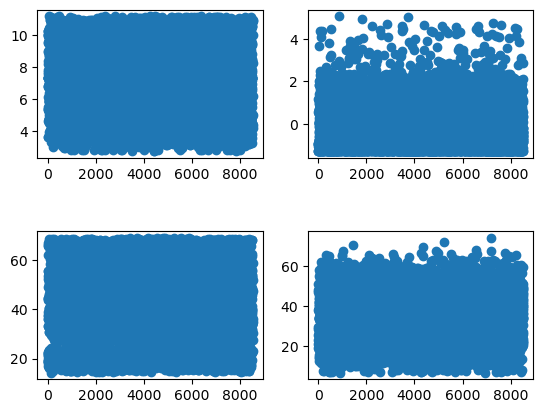

In [44]:
#scatter plots
k=0
for i in range(2):
    for j in range(2):
        ax = plt.subplot(grid[i, j])
        ax.scatter(range(len(numerical_df)), numerical_df.iloc[:, k])
        k += 1
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Soft Drinks'),
  Text(2, 0, 'Meat'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Household'),
  Text(5, 0, 'Baking Goods'),
  Text(6, 0, 'Snack Foods'),
  Text(7, 0, 'Frozen Foods'),
  Text(8, 0, 'Breakfast'),
  Text(9, 0, 'Health and Hygiene'),
  Text(10, 0, 'Hard Drinks'),
  Text(11, 0, 'Canned'),
  Text(12, 0, 'Breads'),
  Text(13, 0, 'Starchy Foods'),
  Text(14, 0, 'Others'),
  Text(15, 0, 'Seafood')])

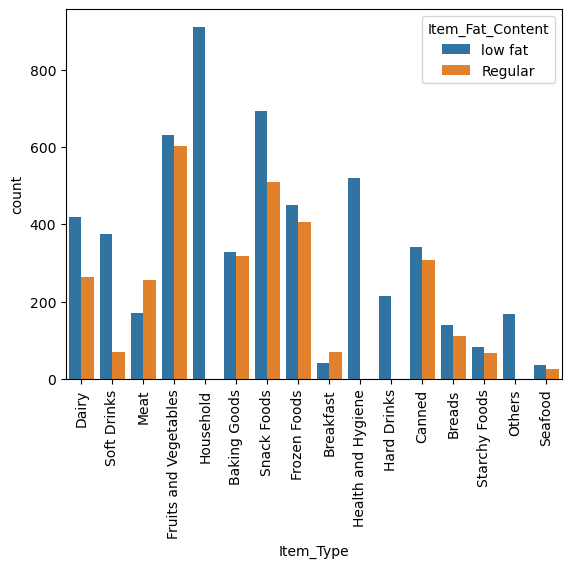

In [45]:
sns.countplot(data=data, x='Item_Type', hue='Item_Fat_Content')
plt.xticks(rotation=90)

Home food is the best!!!

In [46]:
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,,,,,,,,,,,
FDA15,5.530263,low fat,-0.970732,Dairy,65.652445,OUT049,1999,Medium,Tier 1,Supermarket Type1,47.007885
DRC01,3.609073,Regular,-0.908111,Soft Drinks,19.920687,OUT018,2009,Medium,Tier 3,Supermarket Type2,20.958294
FDN15,9.519719,low fat,-0.956917,Meat,43.751419,OUT049,1999,Medium,Tier 1,Supermarket Type1,37.964893
FDX07,10.272881,Regular,-1.281758,Fruits and Vegetables,52.395806,OUT010,1998,Medium,Tier 3,Grocery Store,25.485930
NCD19,5.330905,low fat,-1.281758,Household,21.614642,OUT013,1987,High,Tier 3,Supermarket Type1,28.660858


In [47]:
cat_columns=["Item_Fat_Content","Item_Type","Outlet_Identifier","Outlet_Size","Outlet_Location_Type","Outlet_Type"]

In [48]:
one_data=pd.get_dummies(data,columns=cat_columns)
one_data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
Item_Identifier,,,,,,,,,,,,,,,,,,,,,
FDA15,5.530263,-0.970732,65.652445,1999,47.007885,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
DRC01,3.609073,-0.908111,19.920687,2009,20.958294,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
FDN15,9.519719,-0.956917,43.751419,1999,37.964893,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
FDX07,10.272881,-1.281758,52.395806,1998,25.485930,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
NCD19,5.330905,-1.281758,21.614642,1987,28.660858,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [49]:
# #label encoding
# columns_to_encode=["Item_Fat_Content","Item_Type","Outlet_Identifier","Outlet_Size","Outlet_Location_Type","Outlet_Type"]
# label_encoder = LabelEncoder()
# for column in columns_to_encode:
#     data[column] = label_encoder.fit_transform(data[column])
# data.head()

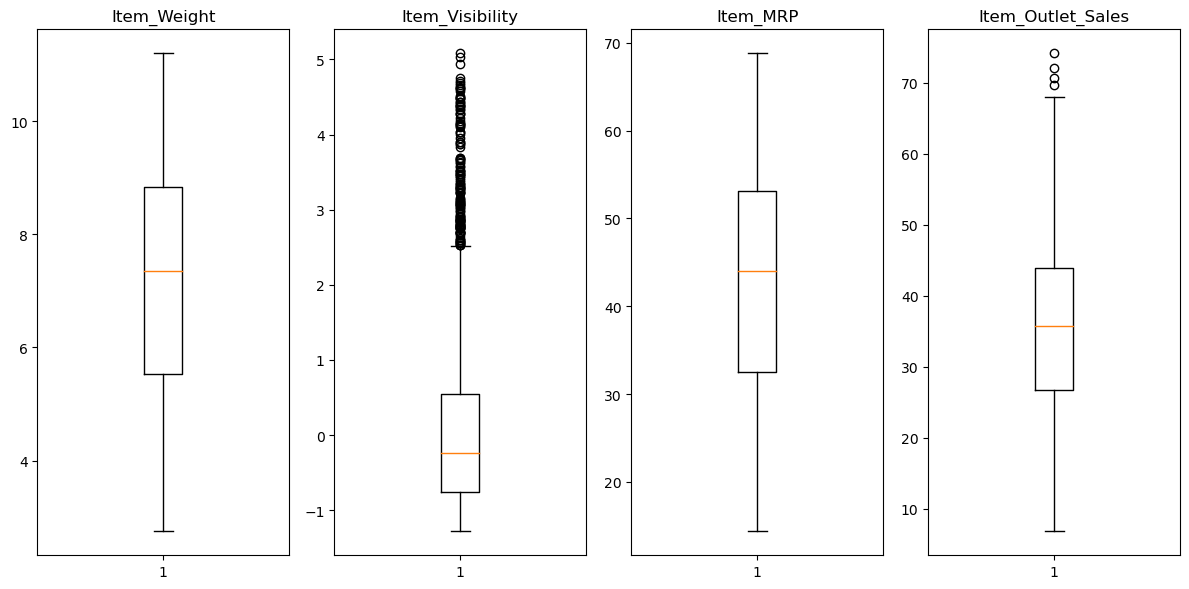

In [50]:
#looking for outliers

fig, axes = plt.subplots(nrows=1, ncols=len(numerical_df.columns), figsize=(12, 6))

# Iterate over the columns and create a box plot for each column
for i, column in enumerate(numerical_df.columns):
    axes[i].boxplot(numerical_df[column])
    axes[i].set_title(column)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

#there are not many outliers and it is not good to remove these outliers in this case

# So, now lets look into test data

In [51]:
test_data=pd.read_csv(r"C:\Users\Dell\Downloads\9961_14084_bundle_archive\Test.csv")
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [52]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [53]:
test_data["Item_Weight"]=test_data["Item_Weight"].fillna(test_data["Item_Weight"].mean())
test_data["Outlet_Size"]=test_data["Outlet_Size"].fillna(test_data["Outlet_Size"].mode()[0])
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                5681 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                5681 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


# Splitting training data into train and validation data sets

In [54]:
#Splitting training data into train and validation data sets
y=one_data["Item_Outlet_Sales"]
x=one_data.drop("Item_Outlet_Sales",axis=1)
train_data, val_data, train_labels, val_labels = train_test_split(x, y, test_size=0.2, random_state=0)

# Linear Regression 

In [55]:
#application of linear regression model
model=LinearRegression()
model.fit(train_data,train_labels)
y_pred=model.predict(val_data)
r2=r2_score(val_labels,y_pred)
print(r2)
mse = mean_squared_error(val_labels, y_pred)
print(mse)

0.6816022598309789
45.88325084634301


In [56]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300000,reg,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [57]:
test_data.set_index("Item_Identifier",inplace=True)
test_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
Item_Identifier,,,,,,,,,,
FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
FDW14,8.300000,reg,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1
NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store
FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1
FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [58]:
#fuzzywuzzy
replace_matches_in_column(test_data,"Item_Fat_Content", "low fat", 20)
replace_matches_in_column(test_data,"Item_Fat_Content", "Regular", 20)
test_data["Item_Fat_Content"].unique()

All done!
All done!


array(['low fat', 'Regular'], dtype=object)

In [59]:
test_data_one=pd.get_dummies(test_data,columns=cat_columns)

In [60]:
test_data_one.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
Item_Identifier,,,,,,,,,,,,,,,,,,,,,
FDW58,20.750000,0.007565,107.8622,1999,0,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
FDW14,8.300000,0.038428,87.3198,2007,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
NCN55,14.600000,0.099575,241.7538,1998,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
FDQ58,7.315000,0.015388,155.0340,2007,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
FDY38,12.695633,0.118599,234.2300,1985,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1


In [61]:
#on test data
y_pred=model.predict(test_data_one)
test_data["Item_Outlet_Sales"]=y_pred

In [62]:
test_data.to_csv('LR_testResults.csv', index=True)

# Regularized Linear Regression

In [63]:
#lasso regression
lasso = Lasso(alpha=0.1)
lasso.fit(train_data, train_labels)
y_pred_lasso = lasso.predict(val_data)
mse_lasso = mean_squared_error(val_labels, y_pred_lasso)
print("Lasso regression MSE: ", mse_lasso)
r2_lasso = r2_score(val_labels,y_pred_lasso)
print("r2:",r2_lasso)
y_pred_lasso=lasso.predict(test_data_one)
test_data["Item_Outlet_Sales"]=y_pred_lasso
test_data.to_csv('lasso_testResults.csv',index=True)

Lasso regression MSE:  46.119235309472344
r2: 0.6799646923441631


In [75]:
#ridge regression
ridge = Ridge(alpha=0.1)
ridge.fit(train_data, train_labels)
y_pred_ridge = ridge.predict(val_data)
mse_ridge = mean_squared_error(val_labels, y_pred_ridge)
print("Ridge regression MSE: ", mse_ridge)
r2_ridge = r2_score(val_labels,y_pred_ridge)
print("r2:",r2_ridge)
y_pred_ridge=ridge.predict(test_data_one)
test_data["Item_Outlet_Sales"]=y_pred_ridge
test_data.to_csv('ridge_testResults.csv',index=True)

Ridge regression MSE:  45.88330431942168
r2: 0.6816018887651303


# Random Forest

In [73]:
#Random Forest
rf = RandomForestRegressor(n_estimators=150, random_state=42)
rf.fit(train_data,train_labels)
y_pred_rf = rf.predict(val_data)
mse_rf = mean_squared_error(val_labels, y_pred_rf)
print("Random Forest regression MSE: ", mse_rf)
r2_rf = r2_score(val_labels,y_pred_rf)
print("r2:",r2_rf)
y_pred_rf=rf.predict(test_data_one)
test_data["Item_Outlet_Sales"]=y_pred_rf
test_data.to_csv('rf_testResults.csv',index=True)

Random Forest regression MSE:  49.015497641320835
r2: 0.6598666529858487


# XGBoost

In [72]:
#XGBoost
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(train_data, train_labels)
y_pred_xgb = xgb_model.predict(val_data)
mse_xgb = mean_squared_error(val_labels, y_pred_xgb)
print("XGBoost regression MSE: ", mse_xgb)
r2_xgb = r2_score(val_labels,y_pred_xgb)
print("r2:",r2_xgb)
y_pred_xgb=xgb_model.predict(test_data_one)
test_data["Item_Outlet_Sales"]=y_pred_xgb
test_data.to_csv('xgboost_testResults.csv',index=True)

XGBoost regression MSE:  51.43506463812477
r2: 0.6430765465797041
